In [1]:
import mysql.connector
import pandas as pd

# Connect to MySQL database (replace with your database connection details)
conn =  mysql.connector.connect(host="127.0.0.1",user="root",password="kanis0111",database="gravity_books")


# Create a cursor object
cursor = conn.cursor()

# Define the SQL query
sql_query = """
SELECT 
    publisher.publisher_name,
    book.title,
    author.author_name,
    book_language.language_name
FROM publisher
JOIN book ON publisher.publisher_id = book.publisher_id
JOIN book_author ON book.book_id = book_author.book_id
JOIN author ON book_author.author_id = author.author_id
JOIN book_language ON book_language.language_id = book.language_id;
"""
# Use pandas to read the SQL query into a DataFrame
df = pd.read_sql(sql_query, conn)

# Show the DataFrame
print(df)

# Close the connection
conn.close()


                                  publisher_name  \
0                                  Thomas Nelson   
1                                  Thomas Nelson   
2                              Time Life Medical   
3                                   Cliffs Notes   
4      Applause Theatre & Cinema Book Publishers   
...                                          ...   
17637                              Ig Publishing   
17638                       Yapı Kredi Yayınları   
17639                       Yapı Kredi Yayınları   
17640                   Bloomsbury USA Childrens   
17641                           Ballantine Books   

                                                   title  \
0                                         The Illuminati   
1                                     The Servant Leader   
2      What Life Was Like in the Jewel in the Crown: ...   
3      Cliffs Notes on Aristophanes' Lysistrata  The ...   
4      Life Is a Dream and Other Spanish Classics (Er...   
...            

C:\Users\91790\AppData\Local\Temp\ipykernel_13908\1241663479.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17642 entries, 0 to 17641
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   publisher_name  17642 non-null  object
 1   title           17642 non-null  object
 2   author_name     17642 non-null  object
 3   language_name   17642 non-null  object
dtypes: object(4)
memory usage: 551.4+ KB


In [3]:
df.isnull()

publisher_name  title  author_name  language_name
0               False  False        False          False
1               False  False        False          False
2               False  False        False          False
3               False  False        False          False
4               False  False        False          False
...               ...    ...          ...            ...
17637           False  False        False          False
17638           False  False        False          False
17639           False  False        False          False
17640           False  False        False          False
17641           False  False        False          False

[17642 rows x 4 columns]

In [4]:
df.dropna(axis=0, inplace=True)
df

publisher_name  \
0                                  Thomas Nelson   
1                                  Thomas Nelson   
2                              Time Life Medical   
3                                   Cliffs Notes   
4      Applause Theatre & Cinema Book Publishers   
...                                          ...   
17637                              Ig Publishing   
17638                       Yapı Kredi Yayınları   
17639                       Yapı Kredi Yayınları   
17640                   Bloomsbury USA Childrens   
17641                           Ballantine Books   

                                                   title  \
0                                         The Illuminati   
1                                     The Servant Leader   
2      What Life Was Like in the Jewel in the Crown: ...   
3      Cliffs Notes on Aristophanes' Lysistrata  The ...   
4      Life Is a Dream and Other Spanish Classics (Er...   
...                                                  ...   
17637                                      In Wonderland   
17638    Harry Potter ve Sırlar Odası (Harry Potter  #2)   
17639    Harry Potter ve Sırlar Odası (Harry Potter  #2)   
17640  Harry Potter and the Philosopher's Stone (Harr...   
17641                       Shield of Thunder (Troy  #2)   

                author_name language_name  
0             Larry Burkett       English  
1      Kenneth H. Blanchard       English  
2           Time-Life Books       English  
3          W. John Campbell       English  
4              Eric Bentley       English  
...                     ...           ...  
17637       Sverre Lyngstad     Norwegian  
17638          J.K. Rowling       Turkish  
17639           Sevin Okyay       Turkish  
17640          J.K. Rowling        Gaelic  
17641       Željko Petrović         Aleut  

[17642 rows x 4 columns]

In [5]:
df.isnull().sum()

publisher_name    0
title             0
author_name       0
language_name     0
dtype: int64

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#StandardScaler is a data preprocessing technique in Sklearn that
# helps to standardize the features of a dataset by removing the mean and scaling to unit variance.

X= df[['language_name','author_name']]
y = df['author_name']

# Handle categorical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Handle numerical features
numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

y = pd.Categorical(y)
# Apply Label Encoding to y
y = label_encoder.fit_transform(y)
y = y.astype(int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

import tensorflow as tf
from tensorflow import keras

# Defining model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'), # Hidden Layer
    keras.layers.Dense(len(set(y)), activation='softmax') # Output layer (number of classes)
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # or categorical_crossentropy
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
#In statistics and machine learning, loss measures the difference between the predicted and actual values.
#Accuracy is calculated by using the number of correct predictions or all predictions made. 
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

C:\Users\91790\AppData\Local\Temp\ipykernel_13908\2071377018.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\91790\AppData\Local\Temp\ipykernel_13908\2071377018.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\91790\AppData\Local\Temp\ipykernel_13908\2071377018.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Epoch 1/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0046 - loss: 9.0023
Epoch 2/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0123 - loss: 8.0071
Epoch 3/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0177 - loss: 7.5742
Epoch 4/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0168 - loss: 7.2866
Epoch 5/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0231 - loss: 7.0516
Epoch 6/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0312 - loss: 6.8314
Epoch 7/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0310 - loss: 6.6772
Epoch 8/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0298 - loss: 6.5676
Epoch 9/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0357 - loss: 6.4194
Epoch 10/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0347 - loss: 6.3315
Epoch 11/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0413 - loss: 6.2459
Epoch 12/100
442/442 ━━━━━━━━━━━━━━━━━━━━

In [7]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9094)           │       300,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,124 (3.46 MB)

 Trainable params: 302,374 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604,750 (2.31 MB)

None


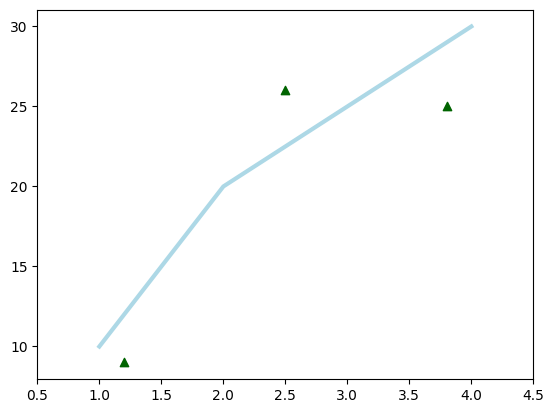

In [8]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax= fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color= "lightblue", linewidth= 3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color= "darkgreen", marker= "^")
ax.set_xlim(0.5, 4.5)
plt.show()

In [9]:

model.predict(X_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.1954697e-05, 2.3020269e-27, 6.2980735e-06, ..., 2.2834595e-19,
        1.2251493e-30, 2.1146035e-27],
       [2.9736275e-15, 1.9601891e-25, 4.4841101e-18, ..., 0.0000000e+00,
        2.1656389e-17, 1.8329807e-19],
       [0.0000000e+00, 1.0211254e-09, 3.6460682e-38, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.7381988e-27, 3.0170104e-14, 5.9333479e-23, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2144111e-16, 6.8684270e-27, 1.4213005e-19, ..., 0.0000000e+00,
        3.6775223e-14, 5.2886821e-16],
       [1.4114343e-20, 9.6149950e-33, 3.0734894e-25, ..., 1.5164143e-14,
        2.4820296e-05, 2.7447413e-06]], dtype=float32)

In [10]:
import joblib
#Joblib is a set of tools to provide lightweight pipelining in Python.
#Pickle is useful for small objects, Joblib is preferred for large NumPy arrays and complex objects. 
# Joblib provides a more efficient way of serializing and deserializing these objects.
joblib.dump(model,'model.pkl')
model=joblib.load('model.pkl')